## Part 1: EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import utils, vocabulary

In [33]:
# Load Data
statements = pd.read_csv("statements_with_labels.csv")

#### 1 (a). Word Counts

In [23]:
# Determine word counts
counts = {} # initialize dictionary of word counts
stm_lengths = [] # initialize list to store statment lengths
for i in statements.text:
    words = i.split()
    stm_lengths.append(len(words))
    for j in words:
        j = j.lower()
        if j not in counts.keys():
            counts[j] = 1
        else:
            counts[j] += 1

In [24]:
print('Number of Observations: ' + str(statements.shape[0]))
print('Unique words: ' + str(len(counts)))

print('')
print('Shortest statement: ' + str(np.min(stm_lengths)) + ' words')
print('Longest statement: ' + str(np.max(stm_lengths)) + ' words')
print('Average statement length: ' + str(np.mean(stm_lengths)) + ' words')

Number of Observations: 171
Unique words: 2475

Shortest statement: 36 words
Longest statement: 993 words
Average statement length: 406.9590643274854 words


In [25]:
scounts = sorted(counts.items(), key=lambda kv: kv[1])
print("Top 10 words: ")
for k, v in scounts[-10:]:
    print(k, v)

Top 10 words: 
its 786
a 790
inflation 794
federal 970
committee 1222
in 1667
and 2218
to 2384
of 2420
the 4993


Notes: 'Committee' is coming in strong, as is expected. 'Federal' and 'inflation' also make surprise appearances in the top 10 items.

(array([ 8., 54., 32.,  5., 21., 14.,  7.,  4., 13., 13.]),
 array([ 36. , 131.7, 227.4, 323.1, 418.8, 514.5, 610.2, 705.9, 801.6,
        897.3, 993. ]),
 <a list of 10 Patch objects>)

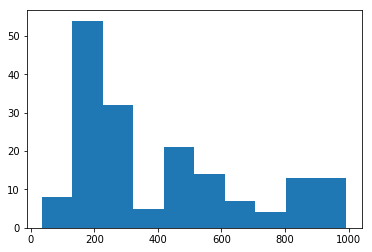

In [26]:
plt.hist(stm_lengths)

(array([32., 14., 26., 13., 40., 25., 17.,  2.,  0.,  2.]),
 array([0.43225084, 0.4834702 , 0.53468956, 0.58590892, 0.63712828,
        0.68834764, 0.739567  , 0.79078636, 0.84200572, 0.89322508,
        0.94444444]),
 <a list of 10 Patch objects>)

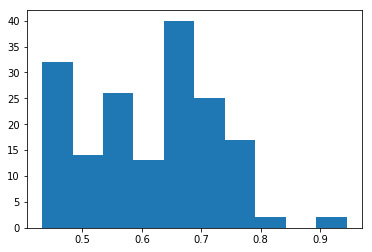

In [27]:
# Count distinct words in each statement
distinct = []
for i in statements.text:
    words = i.split()
    distinct.append(len(set(words))/len(words))
    
plt.hist(distinct)

In [37]:
# Count statement outcomes
statements['labels'].value_counts()

0    91
1    80
Name: labels, dtype: int64